In [60]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import time

In [61]:
df = pd.read_csv('fifa19.csv')
df.columns = df.columns.str.replace(' ', '_')


In [62]:
list = ['GKDiving', 'GKHandling','GKKicking','GKPositioning','GKReflexes','Release_Clause','Work_Rate','Body_Type','Real_Face','Jersey_Number','Joined','Loaned_From','Contract_Valid_Until','Height','Weight','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM', 'LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB', 'RB','Flag','Club','Club_Logo', 'Special',  'Nationality', 'International_Reputation','Photo','ID',  'Name']
df = df[df.Position != 'GK']
df = df.drop(list, axis = 1)
df = df.drop(['Unnamed:_0'],axis = 1)

df_position = pd.get_dummies(df['Position'])
df = pd.concat([df,df_position], axis=1)
#df = df.drop(['Position'],axis = 1)

df['Value'] = df['Value'].str.replace('€', '')
df['Wage'] = df['Wage'].str.replace('€', '')
df['Value'] = df['Value'].str.replace('M', '000000')
df['Value'] = df['Value'].str.replace('K', '000')
df['Value'] = df['Value'].str.replace('.', '')
df['Wage'] = df['Wage'].str.replace('K', '000')
df['Preferred_Foot'] = df['Preferred_Foot'].str.replace('Left', '0')
df['Preferred_Foot'] = df['Preferred_Foot'].str.replace('Right', '1')
df.dropna()
df['Value'] = df['Value'].astype(float)
df['Wage'] = df['Wage'].astype(float)
df = df.dropna(subset=['Preferred_Foot'])
df['Preferred_Foot'] = df['Preferred_Foot'].astype(int)


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16134 entries, 0 to 18206
Data columns (total 64 columns):
Age                16134 non-null int64
Overall            16134 non-null int64
Potential          16134 non-null int64
Value              16134 non-null float64
Wage               16134 non-null float64
Preferred_Foot     16134 non-null int32
Weak_Foot          16134 non-null float64
Skill_Moves        16134 non-null float64
Position           16122 non-null object
Crossing           16134 non-null float64
Finishing          16134 non-null float64
HeadingAccuracy    16134 non-null float64
ShortPassing       16134 non-null float64
Volleys            16134 non-null float64
Dribbling          16134 non-null float64
Curve              16134 non-null float64
FKAccuracy         16134 non-null float64
LongPassing        16134 non-null float64
BallControl        16134 non-null float64
Acceleration       16134 non-null float64
SprintSpeed        16134 non-null float64
Agility           

In [64]:
sns.set(style="whitegrid", font_scale=1.5)

(8.0, 0.0)

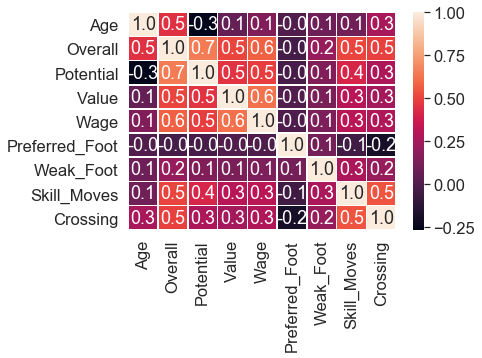

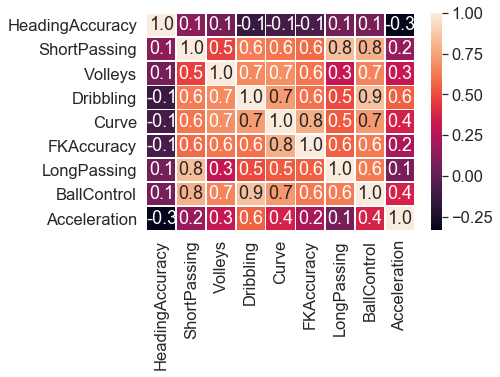

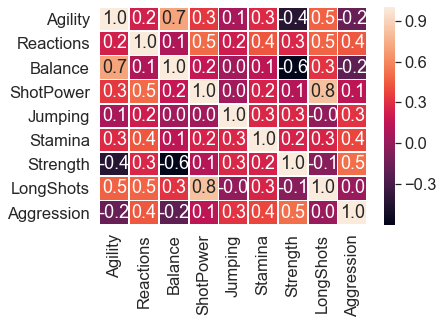

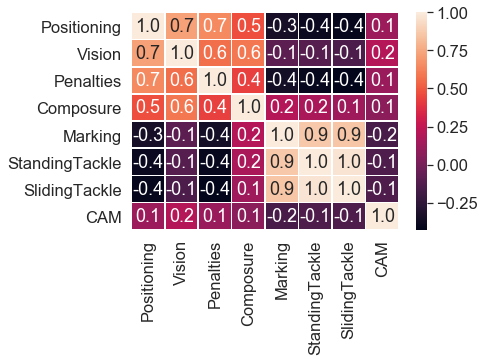

In [65]:
x = df

x_10 = x.iloc[:,0:10]
x_20 = x.iloc[:,11:20]
x_30 = x.iloc[:,21:30]
x_40 = x.iloc[:,31:39]
#figsize=(30, 30))
f,ax = plt.subplots()
ax = sns.heatmap(x_10.corr(), annot=True, linewidths=.7, fmt= '.1f',ax=ax)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

f,ax = plt.subplots()
ax = sns.heatmap(x_20.corr(), annot=True, linewidths=.7, fmt= '.1f',ax=ax)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

f,ax = plt.subplots()
ax = sns.heatmap(x_30.corr(), annot=True, linewidths=.7, fmt= '.1f',ax=ax)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

f,ax = plt.subplots()
ax = sns.heatmap(x_40.corr(), annot=True, linewidths=.7, fmt= '.1f',ax=ax)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)


In [67]:
from sklearn import preprocessing
df = df.drop(['Position'],axis = 1)
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [71]:

df.head()

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,0.60,1.000000,0.978723,0.932489,1.000000,0.0,0.75,0.75,0.890244,1.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.68,1.000000,0.978723,0.064979,0.716814,1.0,0.75,1.00,0.890244,0.988235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.40,0.958333,0.957447,1.000000,0.513274,1.0,1.00,1.00,0.829268,0.905882,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.44,0.937500,0.936170,0.086076,0.628319,1.0,1.00,0.75,1.000000,0.847059,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.44,0.937500,0.914894,0.078481,0.601770,1.0,0.75,0.75,0.853659,0.870588,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
corr = df.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
stats = df[selected_columns]

In [70]:
y = df['Overall']
df = df.drop(['Overall'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.33, random_state=42)

KeyError: 'Overall'

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import BayesianRidge
model = BayesianRidge()
model.fit(X_train, y_train)
#use hard voting to predict (majority voting)
pred=model.predict(X_test)

#print accuracy



In [ ]:
sample1 = [19,95,79000000,88000,1,4,5,78,89,77,82,79,96,79,63,70,90,96,96,92,89,83,83,76,84,76,79,62,38,40,80,70,84,34,34,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]
import pandas as pd



In [ ]:
from sklearn.metrics import r2_score
print(r2_score(pred,y_test))

In [ ]:
len(sample1)

In [ ]:
sample1 = [19,95,79000000,190000,1,4,5,78,91,77,82,79,96,79,63,70,90,96,96,92,89,83,83,76,84,76,79,62,38,40,80,70,84,34,34,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]

df_test = pd.DataFrame(np.array(sample1).reshape(1,62))

pred_sample = model.predict(df_test)
pred_sample

In [ ]:
df

,Age,Potential,Value,Wage,Preferred_Foot,Weak_Foot,Skill_Moves,Crossing,Finishing,HeadingAccuracy,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
8699,22,75,975000.0,5000.0,1,3.0,2.0,50.0,38.0,56.0,...,0,0,0,0,0,0,0,0,0,0
2482,29,74,55000000.0,5000.0,1,2.0,4.0,59.0,76.0,66.0,...,0,0,0,0,0,1,0,0,0,0
15049,21,68,260000.0,1000.0,1,2.0,2.0,55.0,27.0,42.0,...,1,0,0,0,0,0,0,0,0,0
7910,30,67,575000.0,3000.0,0,3.0,2.0,54.0,44.0,52.0,...,0,0,0,0,0,0,0,0,0,0
6654,22,73,1000000.0,2000.0,1,2.0,2.0,41.0,33.0,59.0,...,0,0,0,0,0,0,0,0,0,0
10810,25,70,700000.0,1000.0,1,3.0,2.0,39.0,46.0,52.0,...,0,0,0,0,0,0,0,0,0,0
11629,18,84,950000.0,3000.0,1,3.0,3.0,43.0,67.0,58.0,...,0,0,0,0,0,0,0,0,0,1
7812,23,74,925000.0,13000.0,1,2.0,2.0,44.0,26.0,65.0,...,0,0,0,0,0,0,0,0,0,0
12308,24,66,475000.0,2000.0,1,3.0,3.0,61.0,52.0,41.0,...,0,0,0,0,0,1,0,0,0,0
11275,29,64,350000.0,1000.0,0,2.0,2.0,70.0,49.0,56.0,...,0,0,0,0,0,0,0,0,0,0


array([87.45515581])